In [8]:
from annoy import AnnoyIndex
import pandas as pd
import numpy as np
import cv2
import sys  
sys.path.insert(0, '../')
import matplotlib.pyplot as plt
from bot.utils.color_extractor import ColorFeaturesExtractor
from bot.utils.BOVW_extractor import BOVWFeaturesExtractor
from bot.utils.hog_extractor import HogFeaturesExtractor
from bot.utils.retriever import Retriever
from bot.utils.utils import get_names_from_indexes
import tensorflow as tf
from skimage.io import imread

# Create indexes

In [5]:
def create_index(features_path, index_dir_path, retrieval_mode, metric):
    # read features
    df_features = pd.read_csv(features_path, sep=',', header=None)
    # instantiate retriever
    retriever = Retriever(index_dir_path)
    # create index
    retriever.create_index(df_features, retrieval_mode=retrieval_mode, metric = metric)
#     return df_features

In [3]:
# neural network features
create_index('../data/nn_features.csv', '../indexes/', 'neural_network', 'euclidean')

In [4]:
# color features
create_index('../data/color_features.csv', '../indexes/', 'color', 'euclidean')

In [5]:
# BOVW features
create_index('../data/BOVW_features.csv', '../indexes/', 'bovw', 'euclidean')

In [3]:
# HOG features
create_index('../data/HOG_features.csv', '../indexes/', 'hog', 'euclidean')

# Test retrieval

In [6]:
# utils
def show_images(idx, names_df):
    names = names_df.loc[idx,'name'].values
    for i in range(0,len(names)):
        tmp = cv2.imread('../data/train/' + names[i])
        tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
        plt.imshow(tmp)
        plt.show()

def loadimg(img_path):

    im = tf.keras.preprocessing.image.load_img(
        img_path,
        target_size=(300, 300, 3)
    )
    imarr = tf.keras.preprocessing.image.img_to_array(im)
    imarr = tf.keras.applications.efficientnet.preprocess_input(imarr)
    return np.array([imarr])




loading neural_network ...
loading color ...
loading bovw ...
loading hog ...


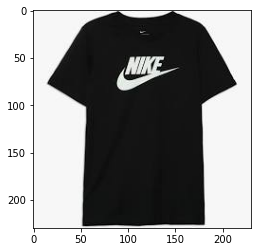

In [38]:
# instantiate retriever
retriever = Retriever('../indexes/', load_all=True)
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
img_path = '../test_imgs/tshirt.jpg'
img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

## Neural network

In [4]:
# read model
model = tf.keras.models.load_model('../data/model.h5')

In [5]:
# NN
img_features_nn = model.predict(loadimg(img_path))[1][0]

In [6]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_nn, retrieval_mode='neural_network', n_neighbours=5, include_distances=True)

retrieve from preloaded indexes


In [7]:
distances

[0.5789197683334351,
 8.45349407196045,
 8.868157386779785,
 8.93391227722168,
 9.006895065307617]

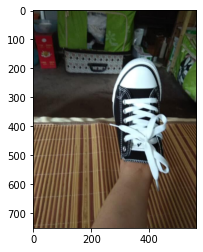

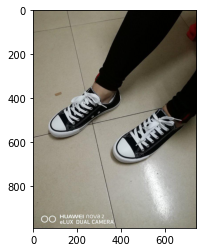

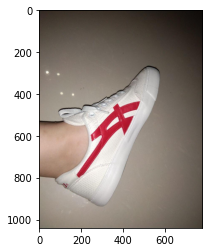

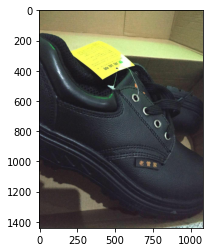

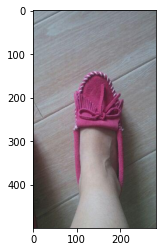

In [8]:
# show retrieval results
show_images(indexes, df_names)


## Color

In [9]:
# color extractor
features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
img_features_color = features_extractor.extract(cv2.imread(img_path), center_only=True)

In [10]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_color, retrieval_mode='color', n_neighbours=5, include_distances=True)

retrieve from preloaded indexes


In [11]:
distances

[0.0,
 0.4744654893875122,
 0.6223447918891907,
 0.6532485485076904,
 0.6754635572433472]

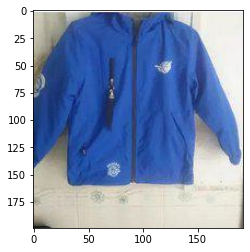

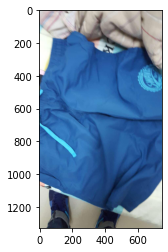

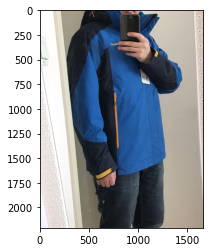

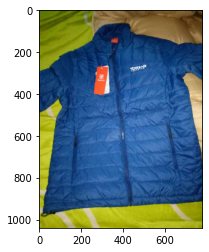

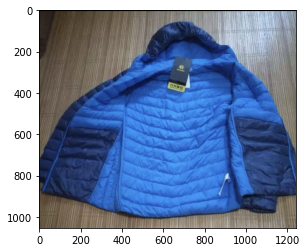

In [7]:
# show retrieval results
show_images(indexes, df_names)

## BOVW

In [62]:
# BOVW extractor
features_extractor = BOVWFeaturesExtractor('../data/')
img_features_bovw = features_extractor.extract(cv2.imread(img_path))

In [63]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_bovw, retrieval_mode='bovw', n_neighbours=5, include_distances=True)

In [64]:
distances

[0.0,
 0.12547647953033447,
 0.12832824885845184,
 0.12836667895317078,
 0.12888458371162415]

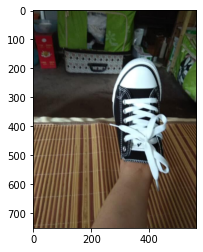

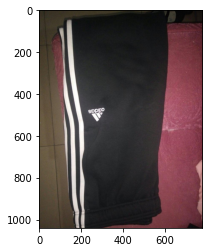

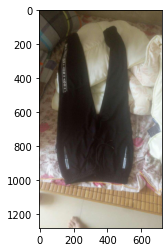

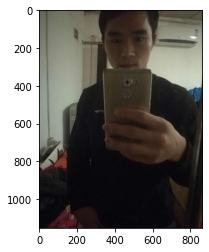

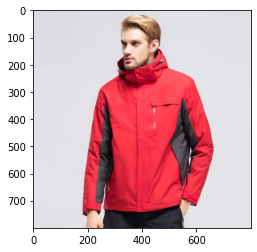

In [65]:
# show retrieval results
show_images(indexes, df_names)

## HOG

In [39]:
# HOG extractor
features_extractor = HogFeaturesExtractor()
img_features_hog = features_extractor.extract(imread(img_path))

In [40]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_hog, retrieval_mode='hog', n_neighbours=10, include_distances=True)

retrieve from preloaded indexes


In [41]:
distances

[9.052635192871094,
 9.056312561035156,
 9.068391799926758,
 9.158824920654297,
 9.168496131896973,
 9.197587013244629,
 9.204880714416504,
 9.216949462890625,
 9.244887351989746,
 9.252216339111328]

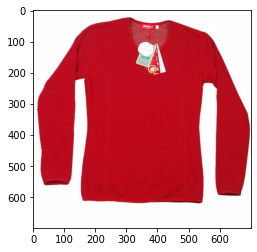

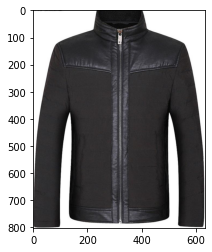

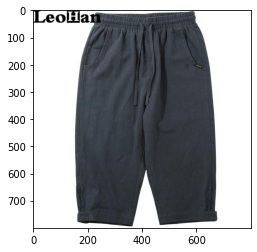

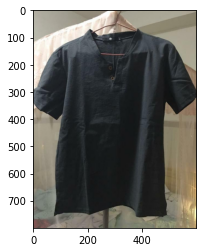

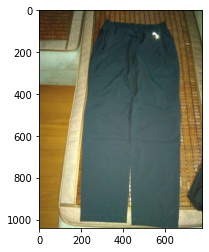

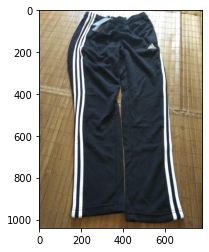

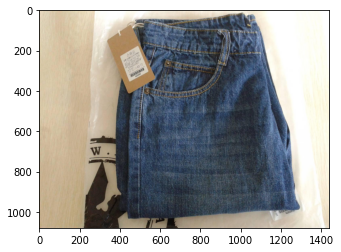

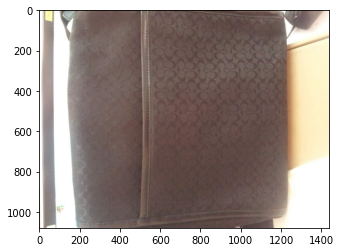

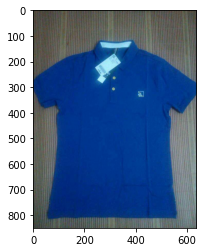

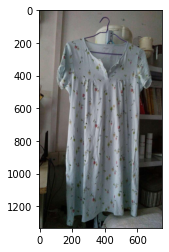

In [42]:
# show retrieval results
show_images(indexes, df_names)

In [ ]:
# test delete index
retriever.delete_index('color')